# Lump Sum, Dollar Cost Averaging (DCA) and Value Averaging (VA) - Which strategy was most profitable for Bitcoin in 2020?

Investors often face the dilemma to buy assets such as stocks or cryptocurrencies at a low price and to sell them later at a higher price. This _"buy low, sell high"_ strategy can cause the investor to wait for a price dip and and thus miss a continuous rise. Market timing often keeps investors away from the markets and works against a long-term investment strategy. In addition, despite fundamental or technical chart analysis, the volatile crypto market isn't 100 % transparent and predictable, so that a favorable entry point is usually not apparent until the future.

This is why the question about the right investment strategy often arises: **Would it be better to invest a fixed amount at once or to spread the sum over a longer period of time?** In this analysis, we use Bitcoin as an example to compare the classic lump sum approach with two investment practices in which the investment is spreaded out over time: Dollar Cost Averaging (DCA) and Value Averaging (VA). For the experiment we make the assumption that we have exactly \$10 per day to invest. For the lump sum strategy the investment amount is calculated by _number of days in 2020 * \$10_.

## Imports and Options

First we have to import the required libraries. We also set the precision of the floats to two decimal places.

In [1]:
import pandas as pd
import numpy as np
import datetime
import quandl

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter


pd.set_option('precision', 2)

## Retrieve and prepare the Quandl dataset

The Bitcoin price data is retrieved using Quandl's Python module. In this analysis we only consider the closing prices (USD.3) of the crypto exchange _Bitstamp_ and the current year 2020. Unfortunately, two days are missing, so we have to insert them manually.

In [2]:
invest_start_date = datetime.datetime(2020, 1, 1)
invest_end_date = datetime.datetime(2020, 12, 31)
bitstamp_btc_usd = quandl.get("BITSTAMP/USD.3", start_date=invest_start_date, end_date=invest_end_date)

missing_rows_df = pd.Series({datetime.datetime(2020, 4, 25): 7555.74, 
                             datetime.datetime(2020, 11, 2): 13597.06}).to_frame('Last')
bitstamp_btc_usd = pd.concat([missing_rows_df, bitstamp_btc_usd])
bitstamp_btc_usd.sort_index(inplace=True)
print(bitstamp_btc_usd.tail())

                Last
2020-12-27  26472.89
2020-12-28  26242.81
2020-12-29  27037.90
2020-12-30  27392.36
2020-12-31  28881.30


## Bitcoin price index 2020

Next we plot the price development of Bitcoin for the year 2020:

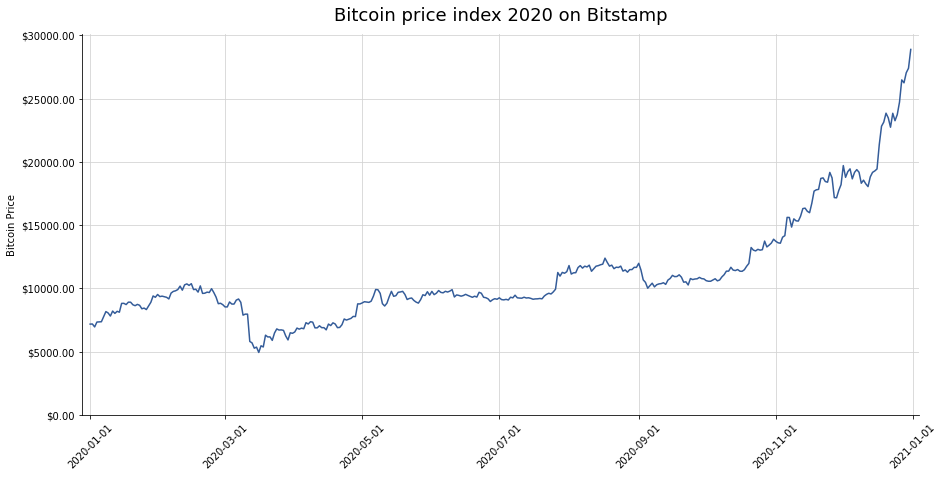

In [3]:
# create the bare bones of our viz
fig, ax = plt.subplots(figsize=(15, 7))

# plot the data
ax.plot(bitstamp_btc_usd.index, bitstamp_btc_usd['Last'], color='#345c99')

# format the date for axis labeling
date_form = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.2f}'))

ax.margins(y=0.05, x=0.01)

# hide the spines on the top and right side
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add a lightgrey grid
ax.grid()
ax.xaxis.grid(color='lightgrey')
ax.yaxis.grid(color='lightgrey')

# change ylim to start from 0
plt.ylim(ymin=0)

# set a title and add labels to axes
plt.title('Bitcoin price index 2020 on Bitstamp', size=18, y=1.02)
plt.xlabel('')
plt.ylabel('Bitcoin Price')

plt.xticks(rotation=45)
plt.show()

The COVID-19 price dip in March 2020 due to the lockdown in many countries around the world is immediately noticeable. Analogous to the stock prices the Bitcoin price has dropped significantly (~ \$5000). Obviously this would have been a good time for a one-time investment, as the price has risen continuously since then.

## Lump Sum

Lump Sum means to invest everything at once and to hodl the acquired Bitcoin until a certain price target is reached or a defined period of time has passed. In this experiment, we assume an investment of \$10 per day. So for the lump sum approach, the daily investment is multiplied by the number of days in 2020. Theoretically, this amount could've been invested on each day in 2020. We'd like to know how much that investment would be worth today.

Accordingly, in the following plot the x-axis represents the date and the y-axis the current value of the investment. In addition, the best day, as well as the worst day in the first half and the worst day in the whole year 2020 are marked for an one-time investment.

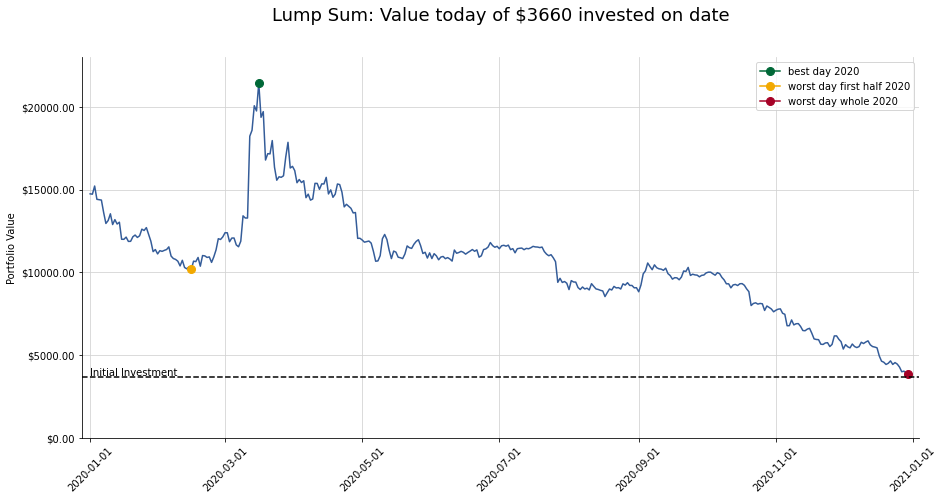

In [4]:
num_of_days = len(bitstamp_btc_usd.index)
lumpsum_investment = num_of_days * 10

num_btc_bought = lumpsum_investment / bitstamp_btc_usd['Last']
lumpsum = num_btc_bought * bitstamp_btc_usd['Last'][-1]

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(lumpsum.index, lumpsum.values, color='#345c99')
plt.plot(lumpsum.idxmax(), lumpsum.max(), marker='o', ms=8, color='#006837', label='best day 2020') 
plt.plot(lumpsum[:-160].idxmin(),lumpsum[:-160].min(), marker='o', ms=8, color='#f2a900', label='worst day first half 2020') 
plt.plot(lumpsum[:-1].idxmin(), lumpsum[:-1].min(), marker='o', ms=8, color='#a60126', label='worst day whole 2020')

ax.axhline(lumpsum_investment, linestyle="--", color="black")
ax.text(lumpsum.index[0], lumpsum_investment*1.03, "Initial Investment")

date_form = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.2f}'))

ax.margins(y=0, x=0.01)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid()
ax.xaxis.grid(color='lightgrey')
ax.yaxis.grid(color='lightgrey')

# change y-axis limits
plt.ylim(ymin=0, ymax=23000)

ax.set_title(f'Lump Sum: Value today of ${lumpsum_investment} invested on date', size=18, y=1.08)
plt.ylabel('Portfolio Value')

plt.legend()
plt.xticks(rotation=45)
plt.show()

A glance at the chart shows that if we'd bought at the bottom, the investment of \$3660 would have been worth ~ \$21445 by the end of the year. This corresponds to a cumulative return of a whopping 486%. It's also noticeable that we wouldn't have made any losses no matter when we would've bought BTC in 2020. Clearly, we'd have less return in more recent investments as it hasn't had time to grow. It's usually better to remain invested over a longer period of time and to avoid get-rich-quick schemes. Or as André Kostolany once put it: _"I can't tell you how to get rich quickly; I can only tell you how to get poor quickly: by trying to get rich quickly."_

In [5]:
lumpsum_performance = pd.DataFrame({
        'Buy_Date': [lumpsum.idxmax().strftime('%b %d, %Y'),
                     lumpsum[:-160].idxmin().strftime('%b %d, %Y'),
                     lumpsum[:-1].idxmin().strftime('%b %d, %Y')],
        'Total_invested': (format(lumpsum_investment, '.2f')),
        'Portfolio_Value': [lumpsum.max(), lumpsum[:-160].min(), lumpsum[:-1].min()],
        'Return': [pd.Series([lumpsum_investment, lumpsum.max()]).pct_change()[1],
                   pd.Series([lumpsum_investment, lumpsum[:-160].min()]).pct_change()[1],
                   pd.Series([lumpsum_investment, lumpsum[:-1].min()]).pct_change()[1]]},
                                   index=['LS_Best', 'LS_Worst1HY', 'LS_Worst'])
lumpsum_performance

,Buy_Date,Total_invested,Portfolio_Value,Return
LS_Best,"Mar 16, 2020",3660.00,21444.94,4.86
LS_Worst1HY,"Feb 15, 2020",3660.00,10199.26,1.79
LS_Worst,"Dec 30, 2020",3660.00,3858.94,0.05


The following chart shows a one-time purchase of Bitcoin in March 2020, the amount invested in USD and the associated performance of the portfolio. This would've been very profitable...

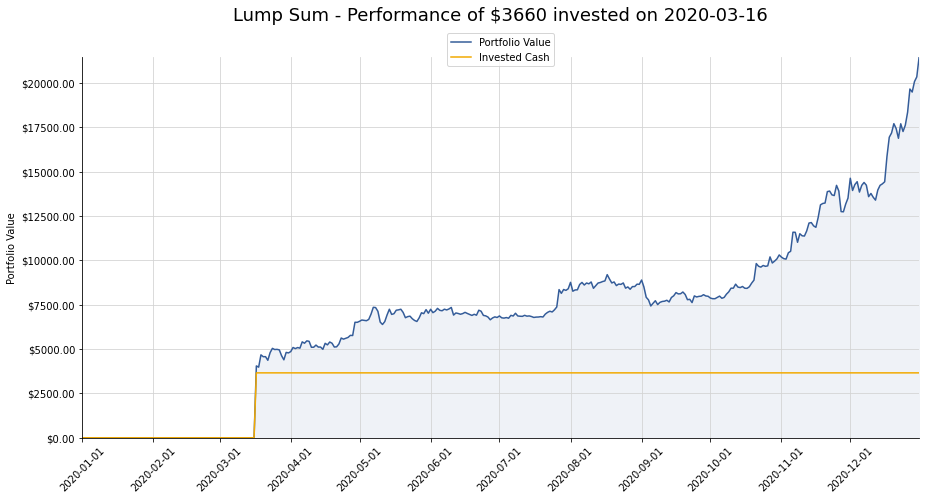

In [6]:
lumpsum_portfolio_value = bitstamp_btc_usd.loc[lumpsum.index, 'Last'] * num_btc_bought.loc[lumpsum.idxmax()]
lumpsum_portfolio_value[lumpsum.index[lumpsum.index <= lumpsum.idxmax()]] = 0.0

invested_usd = pd.Series(lumpsum_investment, index=lumpsum.index)
invested_usd[lumpsum.index[lumpsum.index <= lumpsum.idxmax()]] = 0.0

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(lumpsum_portfolio_value.index, lumpsum_portfolio_value.values, color='#345c99', label='Portfolio Value')
ax.plot(invested_usd.index, invested_usd.values, color='#f2a900', label='Invested Cash')
ax.fill_between(lumpsum_portfolio_value.index, lumpsum_portfolio_value.values, color='#eff2f7')

ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.2f}'))

ax.margins(y=0, x=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid()
ax.xaxis.grid(color='lightgrey')
ax.yaxis.grid(color='lightgrey')

ax.legend(loc='center', bbox_to_anchor=(.5, 1.02))

ax.set_title(f"Lump Sum - Performance of ${lumpsum_investment} invested on {lumpsum.idxmax().strftime('%Y-%m-%d')}", size=18, y=1.08)
plt.ylabel('Portfolio Value')

plt.xticks(rotation=45)
plt.show()

## Dollar Cost Averaging

Instead of investing everything at once, Dollar Cost Averaging (DCA) involves investing a set amount of money (here: \$10) at regular intervals (here: daily). DCA is particularly suitable for investors with a lower risk tolerance. Unfavorable market entries and the influence of short-term price fluctuations can be minimized by spreading the investment over time.

We simulate the DCA strategy with the help of a function. Afterwards we compare the invested amount and the performance of the portfolio.

In [7]:
def simulate_dca(btc_price_df, investment, investment_start, investment_period, investment_freq):
    # get all investment dates starting from start date
    all_investment_dates = pd.date_range(start=investment_start, periods=investment_period, freq=investment_freq)

    # remove dates beyond the last day of the available price data
    buy_dates = all_investment_dates[all_investment_dates <= btc_price_df.index[-1]]
    
    # access past prices
    btc_prices = btc_price_df.loc[buy_dates, 'Last']
    
    # create series for investments (in usd)
    acc_usd_investments = pd.Series(investment, index=buy_dates, name='invested').cumsum()
    
    # get the total of purchased btc for each of those dates
    acc_btc_bought = (investment / btc_prices).cumsum()
    
    # calculate the final portfolio value
    total_portfolio_value = btc_prices * acc_btc_bought
    
    return acc_usd_investments, total_portfolio_value

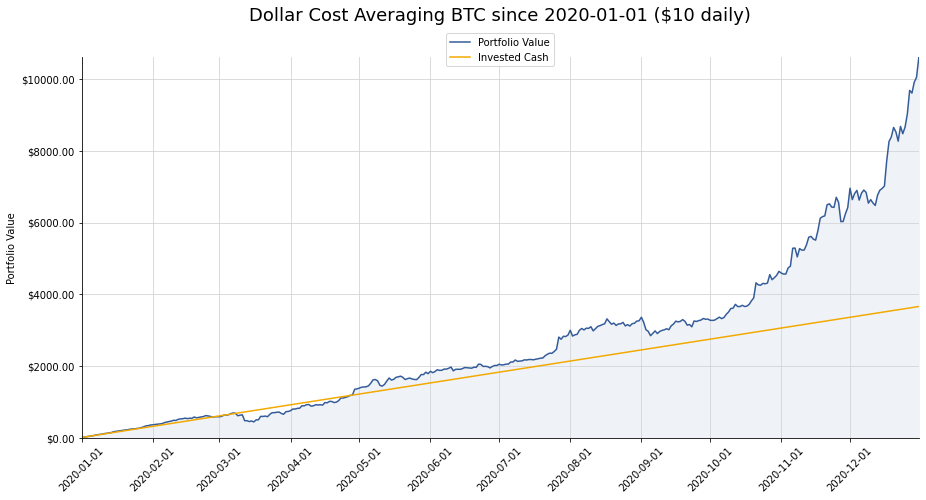

In [8]:
daily_investment_amount = 10
d_period = 366
d_freq = 'D'

acc_daily_investments, daily_dca_portfolio_value = simulate_dca(bitstamp_btc_usd, daily_investment_amount, invest_start_date, d_period, d_freq)

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(daily_dca_portfolio_value.index, daily_dca_portfolio_value.values, color='#345c99', label='Portfolio Value')
ax.plot(acc_daily_investments.index, acc_daily_investments.values, color='#f2a900', label='Invested Cash')
ax.fill_between(daily_dca_portfolio_value.index, daily_dca_portfolio_value.values, color='#eff2f7')

date_form = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.2f}'))

ax.margins(y=0, x=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid()
ax.xaxis.grid(color='lightgrey')
ax.yaxis.grid(color='lightgrey')

ax.legend(loc='center', bbox_to_anchor=(.5, 1.02))

ax.set_title(f'Dollar Cost Averaging BTC since 2020-01-01 (${daily_investment_amount} daily)', size=18, y=1.08)
plt.ylabel('Portfolio Value')


plt.xticks(rotation=45)
plt.show()

Interesting. The distance between the blue curve and the orange line shows that this strategy generates significantly less return than the lump sum strategy on the best possible day. Nonetheless, apart from the price dip in March due to the pandemic, the DCA strategy would've been profitable most of the time. Especially after the Bitcoin Halving in May there was a continuous upward trend and positive returns. This strategy would've almost tripled our investment.

In [9]:
dca_performance = pd.DataFrame({
        'Buy_Date': f"{acc_daily_investments.index[0].strftime('%b %d')}-{acc_daily_investments.index[-1].strftime('%b %d, %Y')}",
        'Total_invested': (format(acc_daily_investments.iloc[-1], '.2f')),
        'Portfolio_Value': daily_dca_portfolio_value.iloc[-1],
        'Return': pd.Series([acc_daily_investments.iloc[-1], daily_dca_portfolio_value.iloc[-1]]).pct_change()[1]}, 
                               index=['DCA'])

dca_performance

,Buy_Date,Total_invested,Portfolio_Value,Return
DCA,"Jan 01-Dec 31, 2020",3660.00,10606.83,1.9


## Value Averaging

Another investment strategy similar to the DCA approach is called Value Averaging. With VA, the investment amount is adjusted to the current price. An [Investopedia article](https://www.investopedia.com/articles/stocks/07/dcavsva.asp) describes the procedure as follows:

> Value averaging is conducted by calculating predetermined amounts for the total value of the investment in future periods, then by making an investment to match these amounts at each future period.

Instead of investing a **fixed** amount of money in each period, a VA strategy involves making investments based on the current total value of the portfolio at the time and aligning the investment amount accordingly. The idea behind this approach is to buy more when the price falls and less when the price rises.

Unfortunately, the function for simulating VA is more complex, as the investment amount must be constantly adjusted. This was solved with a for-loop. For comparison purposes, the invested amount and the performance of the portfolio are compared afterwards.

In [10]:
def simulate_va(btc_price_df, investment, investment_start, investment_period, investment_freq):
    # get all investment dates starting from start date
    all_investment_dates = pd.date_range(start=investment_start, periods=investment_period, freq=investment_freq)

    # remove dates beyond the last day of the available price data
    buy_dates = all_investment_dates[all_investment_dates <= btc_price_df.index[-1]]
    
    # access past prices
    btc_prices =  btc_price_df.loc[buy_dates, 'Last']
    
    # create series for investment goal / targeted portfolio value for each date
    acc_investment_goal = pd.Series(investment, index=buy_dates, name='portfolio_value').cumsum()
    
    # create empty series for purchased btc (will be filled in loop)
    num_btc_bought = pd.Series(np.nan, index=buy_dates)
    acc_btc_bought = pd.Series(np.nan, index=buy_dates)
    
    # add initial investment as further VA investments depends on it
    num_btc_bought.iloc[0] = acc_investment_goal.iloc[0] / btc_prices.iloc[0]
    acc_btc_bought.iloc[0] = acc_investment_goal.iloc[0] / btc_prices.iloc[0]
    
    # iterate through buy dates to set bought btc for each day
    for d in range(1, len(buy_dates)):
        # check if investment would be positive to reach the target invested amount on date d
        if (acc_investment_goal.iloc[d] - (btc_prices.iloc[d] * acc_btc_bought[d-1])) / btc_prices.iloc[d] > 0:
            # set num of btcs bought on date d (investment goal - current portfolio value) / current price
            num_btc_bought.iloc[d] = (acc_investment_goal.iloc[d] - (btc_prices.iloc[d] * acc_btc_bought[d-1])) / btc_prices.iloc[d]
        else:
            # set num of btc bought to 0 as portfolio grew enough in value
            num_btc_bought.iloc[d] = 0.0 
        
        # cumsum bought btc as next investment depends on current portfolio value
        acc_btc_bought = num_btc_bought.cumsum()
    
    # actual VA investments on each date
    acc_investments = (btc_prices * num_btc_bought).cumsum()
    
    return acc_investment_goal, acc_investments

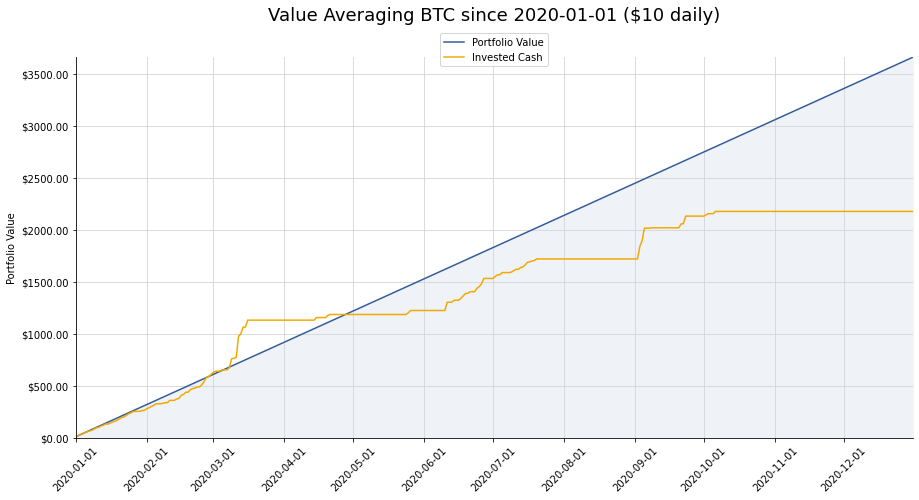

In [11]:
daily_va_portfolio_value, acc_va_daily_investments = simulate_va(bitstamp_btc_usd, daily_investment_amount, invest_start_date, d_period, d_freq)

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(daily_va_portfolio_value.index, daily_va_portfolio_value.values, color='#345c99', label='Portfolio Value')
ax.plot(acc_va_daily_investments.index, acc_va_daily_investments.values, color='#f2a900', label='Invested Cash')
ax.fill_between(daily_va_portfolio_value.index, daily_va_portfolio_value.values, color='#eff2f7')

ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:.2f}'))

ax.margins(y=0, x=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid()
ax.xaxis.grid(color='lightgrey')
ax.yaxis.grid(color='lightgrey')

ax.legend(loc='center', bbox_to_anchor=(.5, 1.02))

ax.set_title(f'Value Averaging BTC since 2020-01-01 (${daily_investment_amount} daily)', size=18, y=1.08)
plt.ylabel('Portfolio Value')

plt.xticks(rotation=45)
plt.show()

The final portfolio value seems to be the lowest. This is because we had to invest significantly less to reach the predefined investment target of \$10 per day. As the chart indicates, with VA we wouldn't have made any investments since about October, because the portfolio value had risen so sharply that our investment target has been already achieved.

In [12]:
va_performance = pd.DataFrame({
        'Buy_Date': f"{acc_va_daily_investments.index[0].strftime('%b %d')}-{acc_va_daily_investments.index[-1].strftime('%b %d, %Y')}",
        'Total_invested': (format(acc_va_daily_investments.iloc[-1], '.2f')),
        'Portfolio_Value': daily_va_portfolio_value.iloc[-1],
        'Return': [pd.Series([acc_va_daily_investments.iloc[-1], daily_va_portfolio_value.iloc[-1]]).pct_change()[1]]},
                              index=['VA'])
va_performance

,Buy_Date,Total_invested,Portfolio_Value,Return
VA,"Jan 01-Dec 31, 2020",2177.63,3660,0.68


## Comparison of Investment Strategies

Finally, let's merge the perfomance datasets of all three investment strategies and sort the cumulative returns in descending order.

In [13]:
strategies_performance = pd.concat([lumpsum_performance, dca_performance, va_performance]).sort_values("Return", ascending=False)
strategies_performance

,Buy_Date,Total_invested,Portfolio_Value,Return
LS_Best,"Mar 16, 2020",3660.00,21444.94,4.86
DCA,"Jan 01-Dec 31, 2020",3660.00,10606.83,1.90
LS_Worst1HY,"Feb 15, 2020",3660.00,10199.26,1.79
VA,"Jan 01-Dec 31, 2020",2177.63,3660.00,0.68
LS_Worst,"Dec 30, 2020",3660.00,3858.94,0.05


All strategies were profitable. Even the worst lump sum investment, which hadn't time to grow as it would've been made on the penultimate day of the year, resulted in a small return.

## Conclusion

The _"right"_ investment strategy always depends on the risk tolerance of the investor. DCA is most attractive for passive investors as the strategy is simple to implement, easy to follow and delivers comparably good returns with low risk. DCA and even the worst possible Lump Sum investment in the first half year outperformed the VA strategy because the price has risen so rapidly and strongly by the end of the year. Nevertheless, the latter promises maximum returns in the long run as it demands a surplus of cash, so the investor can double down when the price is dumping. [Previous experiments on the S&P500](http://tetration.xyz/lumpsum_vs_dca/) have shown that a lump sum investment leads to higher returns ~66% of the time. If someone bets on continuously rising prices, is more risk-friendly and has the money upfront, this strategy is probably the best choice.

### References

Thanks to the Github user [Elucidation](https://github.com/Elucidation), whose lumpsum_vs_dca analysis was an inspiration for this notebook. The illustrations are inspired by the [Dollar Cost Averaging Tool](https://www.blockchaincenter.net/dollar-cost-averaging/) from Blockchaincenter.
